In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

p = plt.rcParams
p["figure.dpi"] = 300

# Fonctions

In [17]:
def get_dataset_data(annee) : 
    path = f"data/etatcivil{annee}_mar{annee}_csv/FD_MAR_{annee}.csv"
    return pd.read_csv(path, sep=';')

In [15]:
def get_dataset_corresp_labels(annee) : 
    path = f"data/etatcivil{annee}_mar{annee}_csv/Varmod_MAR_{annee}.csv"
    return pd.read_csv(path, sep=';')

In [27]:
#data : tableau de tableau avec data[0]= [Y1,Y2] qui signfie qu'en 0 on veut afficher Y1 et Y2
def autoplot(data) :
  for i in range(len(data)) : 
    color = "C0"
    for j in  (data[i]) : 
      ax.bar(X*5 + i, j, color=color, alpha=1.00 - i*0.25)
      color = "C1"

# Visualisation des données

In [21]:
df_2018 = get_dataset_data(2018)
df_2019 = get_dataset_data(2019)

df_corresp_labels_2018 = get_dataset_corresp_labels(2018)
df_corresp_labels_2019 = get_dataset_corresp_labels(2019)

<ipython-input-21-1d90c98f10a7>:1: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  df_2018 = get_dataset_data(2018)
<ipython-input-21-1d90c98f10a7>:2: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  df_2019 = get_dataset_data(2019)


In [22]:
df_2018.head()

,AMAR,ANAIS1,ANAIS2,DEPDOM,DEPMAR,DEPNAIS1,DEPNAIS2,ETAMAT1,ETAMAT2,INDNAT1,INDNAT2,JSEMAINE,MMAR,NBENFCOM,SEXE1,SEXE2,TUCOM,TUDOM
0,2018,1999,1999,99,01,99,99,1,1,2,2,6,11,N,M,F,NaN,9
1,2018,1987,1987,99,01,70,99,1,1,1,2,6,8,N,M,F,NaN,9
2,2018,1990,1990,99,01,74,01,1,1,1,1,6,7,N,M,F,NaN,9
3,2018,1985,1986,99,01,69,99,1,1,1,2,6,12,N,M,F,NaN,9
4,2018,1985,1986,99,01,69,99,1,1,1,2,6,12,N,M,F,NaN,9


In [23]:
df_2019.head()

,AMAR,ANAIS1,ANAIS2,DEPDOM,DEPMAR,DEPNAIS1,DEPNAIS2,ETAMAT1,ETAMAT2,INDNAT1,INDNAT2,JSEMAINE,MMAR,NBENFCOM,SEXE1,SEXE2,TUCOM,TUDOM
0,2019,1979,1979,99,01,99,01,4,4,2,1,6,12,N,M,F,NaN,9
1,2019,1990,1990,99,01,99,30,1,1,2,1,2,12,N,M,F,NaN,9
2,2019,1992,1995,99,01,75,01,1,1,1,1,6,8,N,M,F,NaN,9
3,2019,1982,1989,99,01,99,72,1,1,2,1,6,8,N,M,F,NaN,9
4,2019,1989,1988,99,01,69,01,1,1,1,1,6,6,N,M,F,NaN,9


In [24]:
df_corresp_labels_2018.head()

,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR
0,AMAR,Année du mariage,2018,2018,CHAR,4
1,ANAIS1,Année de naissance du conjoint 1,1920,1920,CHAR,4
2,ANAIS1,Année de naissance du conjoint 1,1921,1921,CHAR,4
3,ANAIS1,Année de naissance du conjoint 1,1922,1922,CHAR,4
4,ANAIS1,Année de naissance du conjoint 1,1923,1923,CHAR,4


In [25]:
df_corresp_labels_2019.head()

,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR
0,AMAR,Année du mariage,2019,2019,CHAR,4
1,ANAIS1,Année de naissance du conjoint 1,1921,1921,CHAR,4
2,ANAIS1,Année de naissance du conjoint 1,1922,1922,CHAR,4
3,ANAIS1,Année de naissance du conjoint 1,1923,1923,CHAR,4
4,ANAIS1,Année de naissance du conjoint 1,1924,1924,CHAR,4


# Graphiques

## Faire un diagramme en barre avec la différence de nombre de mariages par mois entre 2019 et 2018

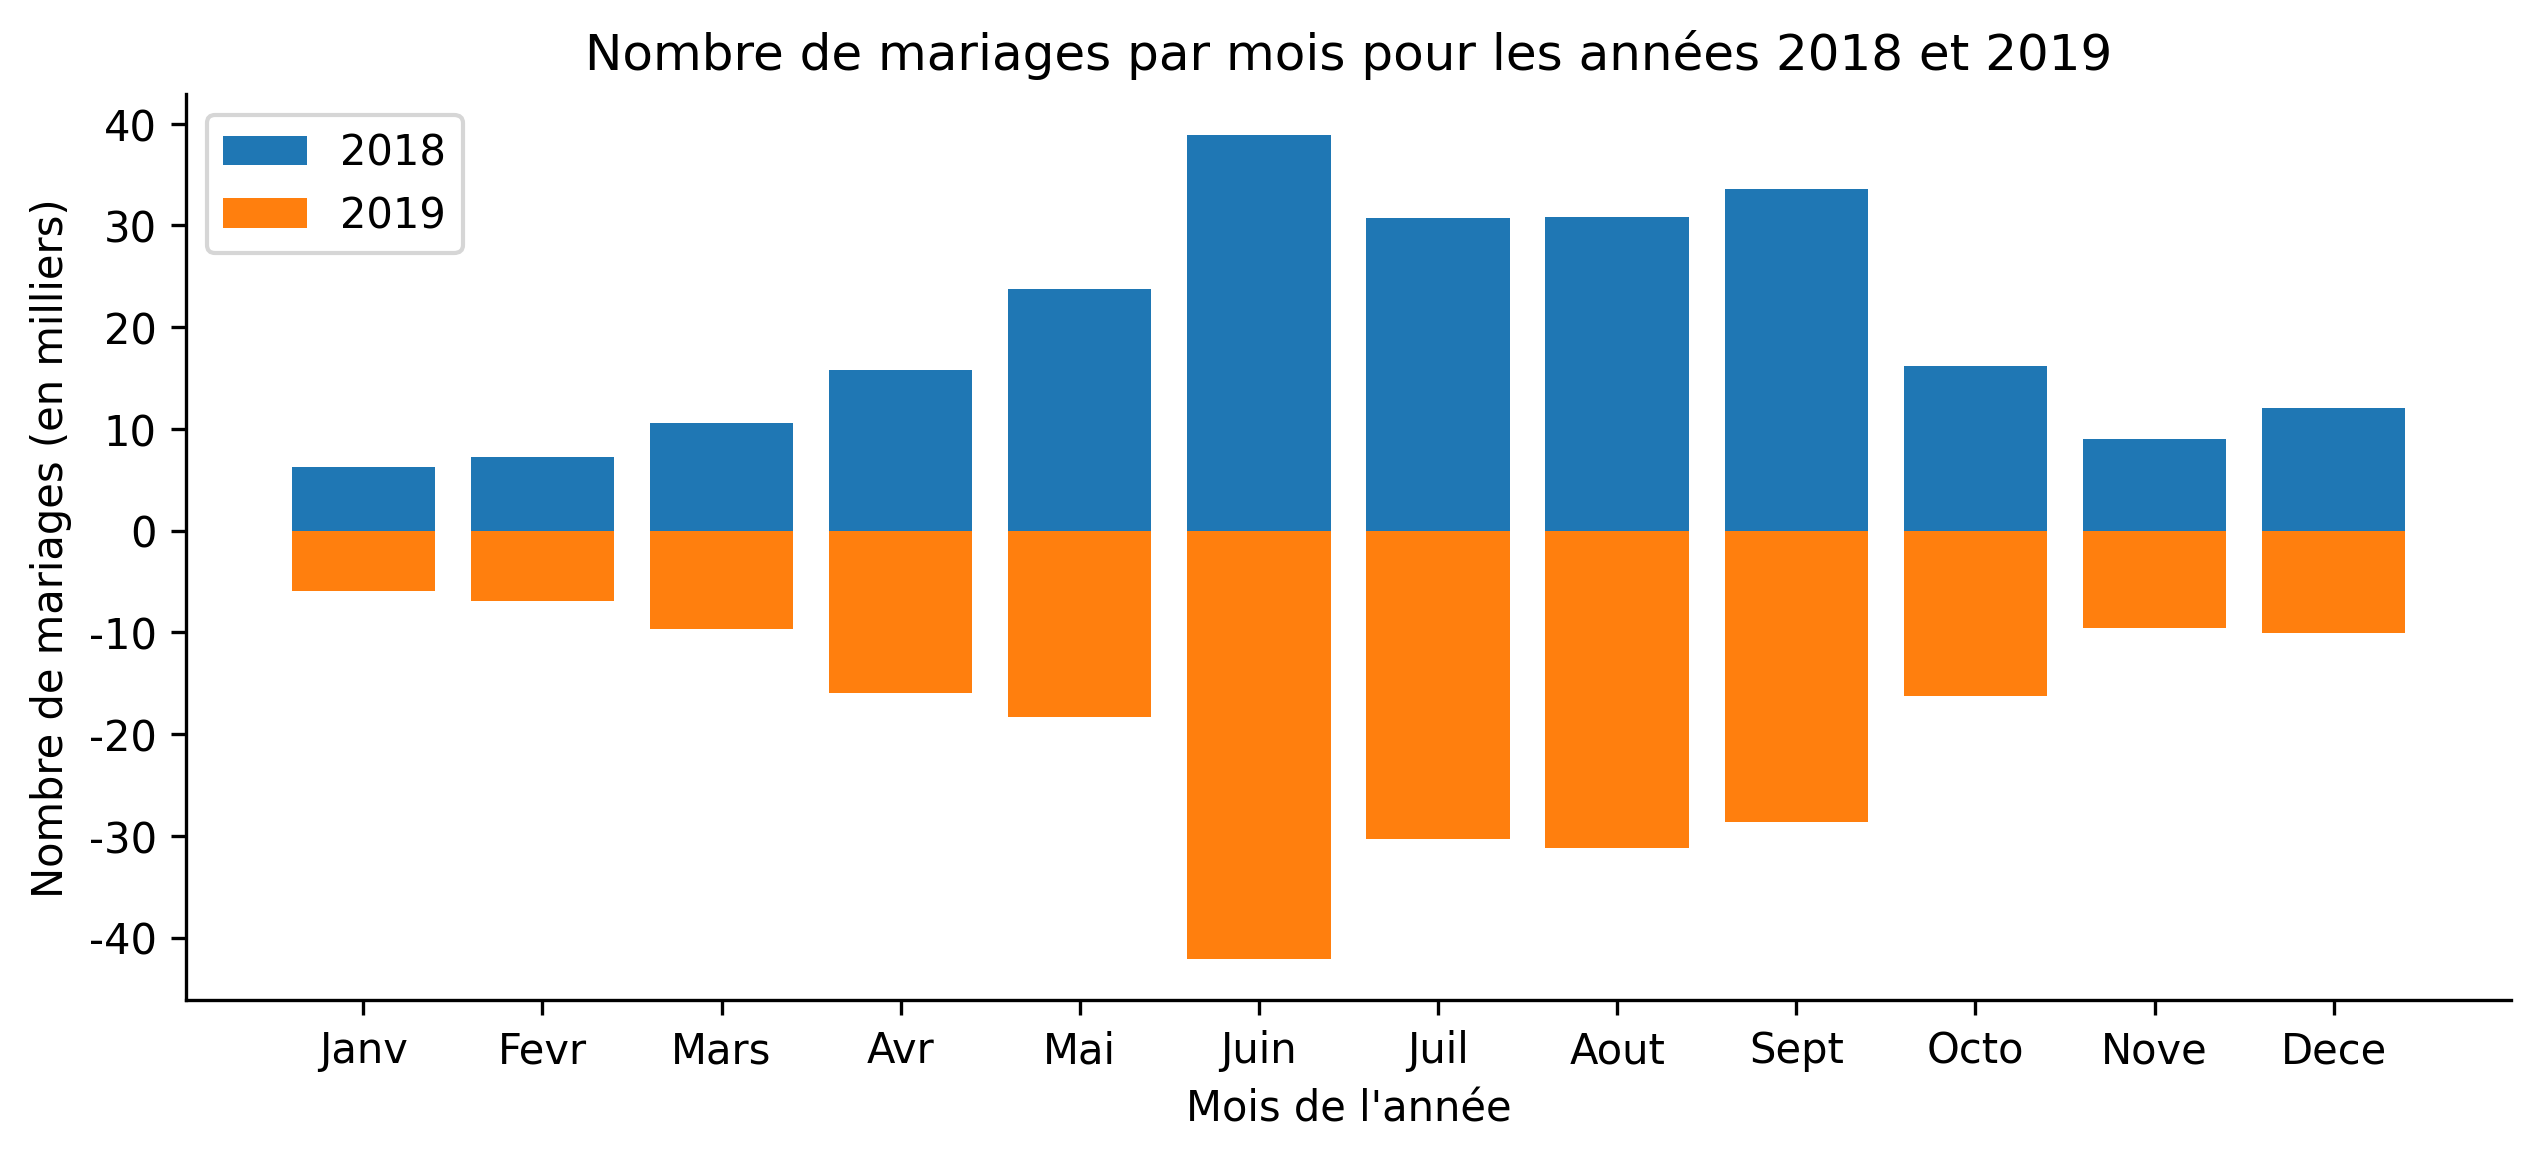

In [78]:
X = np.arange(0,13)

data = []
for i in range(1, 13) : 
    nb_mariage_mois = [df_2018[df_2018['MMAR'] == i].shape[0], - df_2019[df_2019['MMAR'] == i].shape[0]]
    data.append(nb_mariage_mois)

fig = plt.figure(figsize=(10,4));
ax = plt.subplot();

for i in range(len(data)) : 
    color = "C0"
    for j in  (data[i]) : 
        ax.bar(X[i], j, color=color)
        color = "C1"

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)

mois = ['Janv', 'Fevr', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Aout', 'Sept', 'Octo', 'Nove', 'Dece']
ax.set_xticks(np.arange(len(data)))
ax.set_xticklabels(mois)

ax.set_yticks([-40000, -30000, -20000, -10000,0,10000,20000,30000,40000])
ax.set_yticklabels([-40, -30, -20, -10, 0, 10, 20, 30, 40])

ax.set_xlabel("Mois de l'année")
ax.set_ylabel("Nombre de mariages (en milliers)")

plt.legend(["2018", "2019"],loc=2)
plt.title("Nombre de mariages par mois pour les années 2018 et 2019")
plt.show();

## Faire diagramme barres avec 3x2 barres : celibataire, divorcée, veuf et pour chaque situation une barre femme et une barre homme

In [96]:
def get_all_from_etamat(etamat, df_annee) : 
    # regroupe tous les conjoints num_conjoint qui étaient etatmat avant le mariage pour une année donnée
    df1 = df_annee[df_annee[f'ETAMAT1'] == etamat]
    df2 = df_annee[df_annee[f'ETAMAT1'] == etamat]

    nb_hommes =  df1[df1['SEXE1'] == 'M'].shape[0] + df2[df2['SEXE1'] == 'M'].shape[0] 
    nb_femmes =  df1[df1['SEXE1'] == 'F'].shape[0] + df2[df2['SEXE1'] == 'F'].shape[0] 
    return nb_hommes, nb_femmes


In [97]:
nb_homme_celib_2018, nb_femme_celib_2018 = get_all_from_etamat(1, df_2018)
nb_homme_celib_2019, nb_femme_celib_2019 = get_all_from_etamat(1, df_2019)

nb_homme_celib_2018, nb_femme_celib_2018 = get_all_from_etamat(1, df_2018)
nb_homme_celib_2019, nb_femme_celib_2019 = get_all_from_etamat(1, df_2019)


